In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/layoffs.csv')

In [4]:
df.shape

(1714, 9)

In [5]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
1,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
2,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
3,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
4,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0


In [6]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         505
percentage_laid_off    562
date                     0
stage                    4
country                  0
funds_raised           123
dtype: int64

In [7]:
df = df.drop(['funds_raised','percentage_laid_off', 'stage'], axis=1)
df.total_laid_off = df.total_laid_off.fillna(1) # lets assume there must be atleast 1 reported layoff in any company in this dataset
df.industry = df.industry.fillna('Unknown')
df.total_laid_off = df.total_laid_off.astype(int) # layoffs should be whole numbers not floats

In [8]:
df.shape

(1714, 6)

In [9]:
df.isna().sum()

company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
dtype: int64

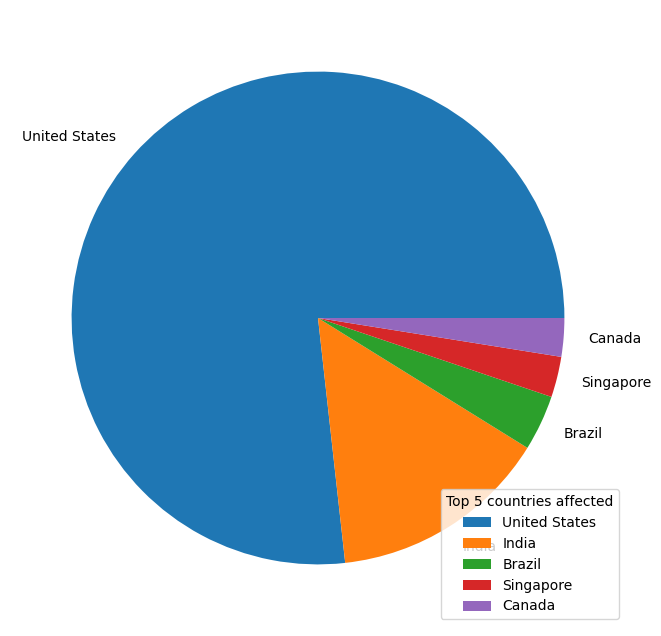

In [10]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True)
plt.legend(title='Top 5 countries affected')

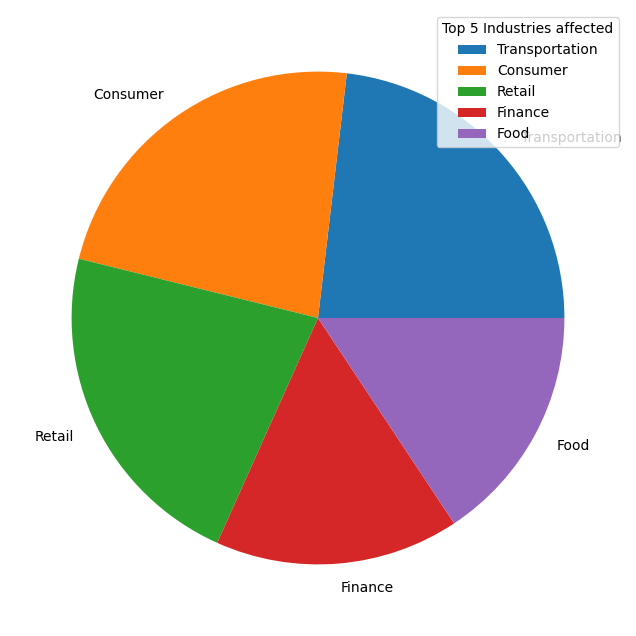

In [11]:
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True)
plt.legend(title='Top 5 Industries affected')

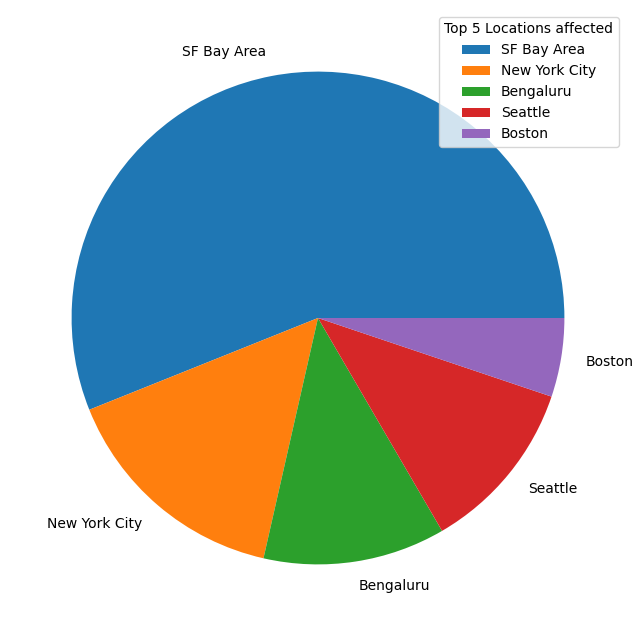

In [12]:
df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True)
plt.legend(title='Top 5 Locations affected')

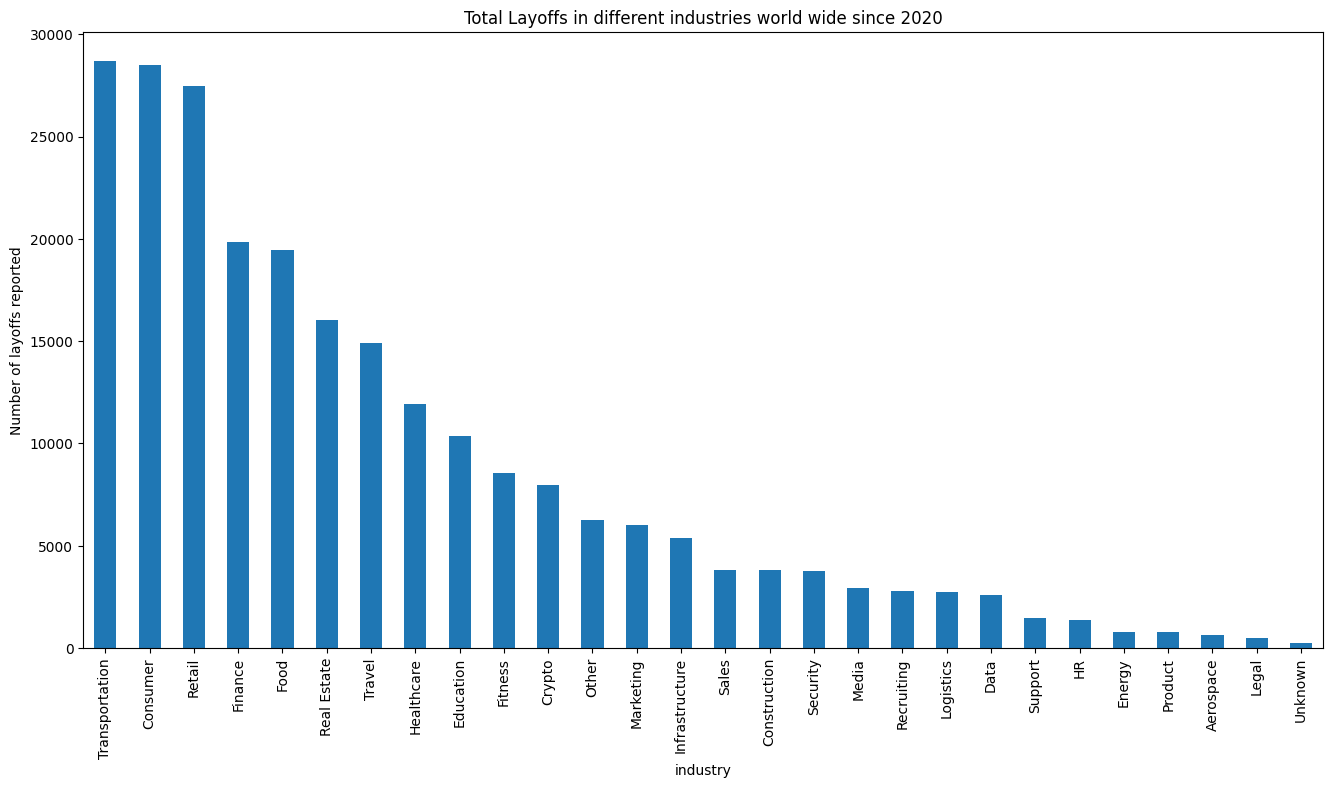

In [13]:
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True)

In [14]:
df = df.set_index('date')
df_2022 = df.loc[:'2022']
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

Year 2022 - Top 5 companies that laid off their employees

In [15]:
df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000,United States
2022-11-16,Amazon,Seattle,Retail,10000,United States
2022-11-16,Cisco,SF Bay Area,Infrastructure,4100,United States
2022-11-04,Twitter,SF Bay Area,Consumer,3700,United States
2022-03-08,Better.com,New York City,Real Estate,3000,United States


Year 2021 - Top 5 companies that laid off their employees

In [16]:
df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434,United States
2021-11-02,Zillow,Seattle,Real Estate,2000,United States
2021-01-21,Instacart,SF Bay Area,Food,1877,United States
2021-01-06,WhiteHat Jr,Mumbai,Education,1800,India
2021-08-05,Bytedance,Shanghai,Consumer,1800,China


Year 2020 - Top 5 companies that laid off their employees

In [17]:
df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False)
df_2020_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375,Netherlands
2020-05-06,Uber,SF Bay Area,Transportation,3700,United States
2020-05-18,Uber,SF Bay Area,Transportation,3000,United States
2020-04-13,Groupon,Chicago,Retail,2800,United States
2020-05-05,Airbnb,SF Bay Area,Travel,1900,United States


<Axes: title={'center': '2022 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

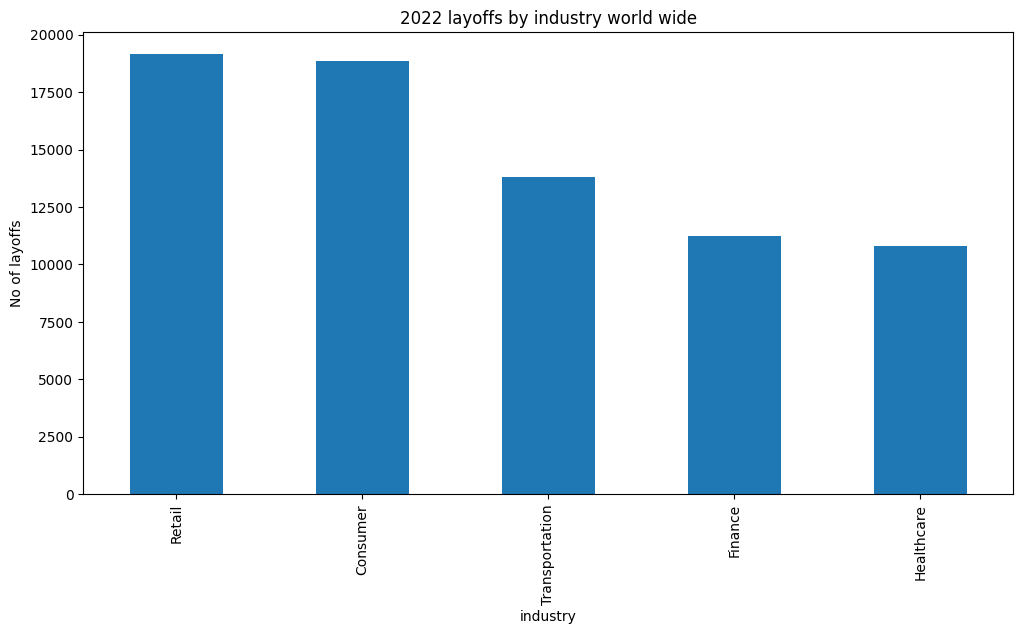

In [18]:
df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2022 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True)

<Axes: title={'center': '2021 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

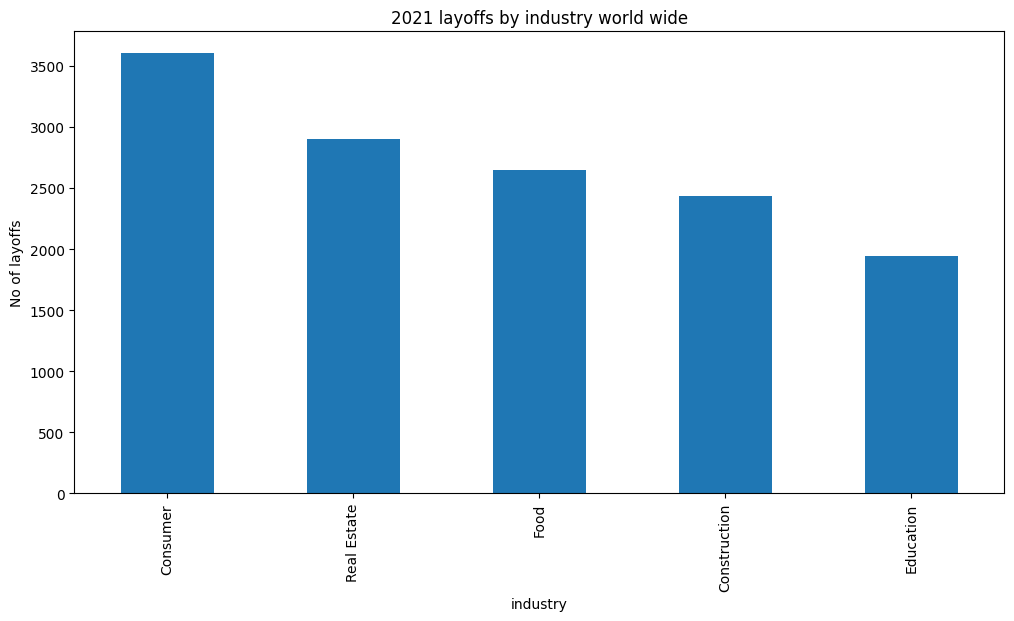

In [19]:
df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2021 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True)

<Axes: title={'center': '2020 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

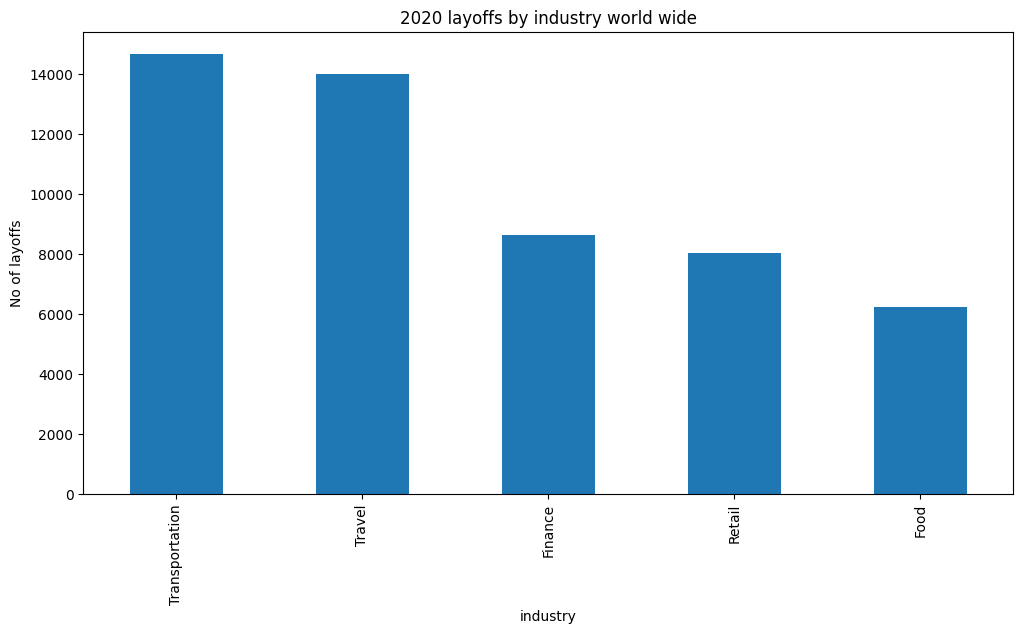

In [20]:
df_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2020 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True)

In [21]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()

In [22]:
df_industry = df_industry.reset_index()

<Axes: title={'center': 'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

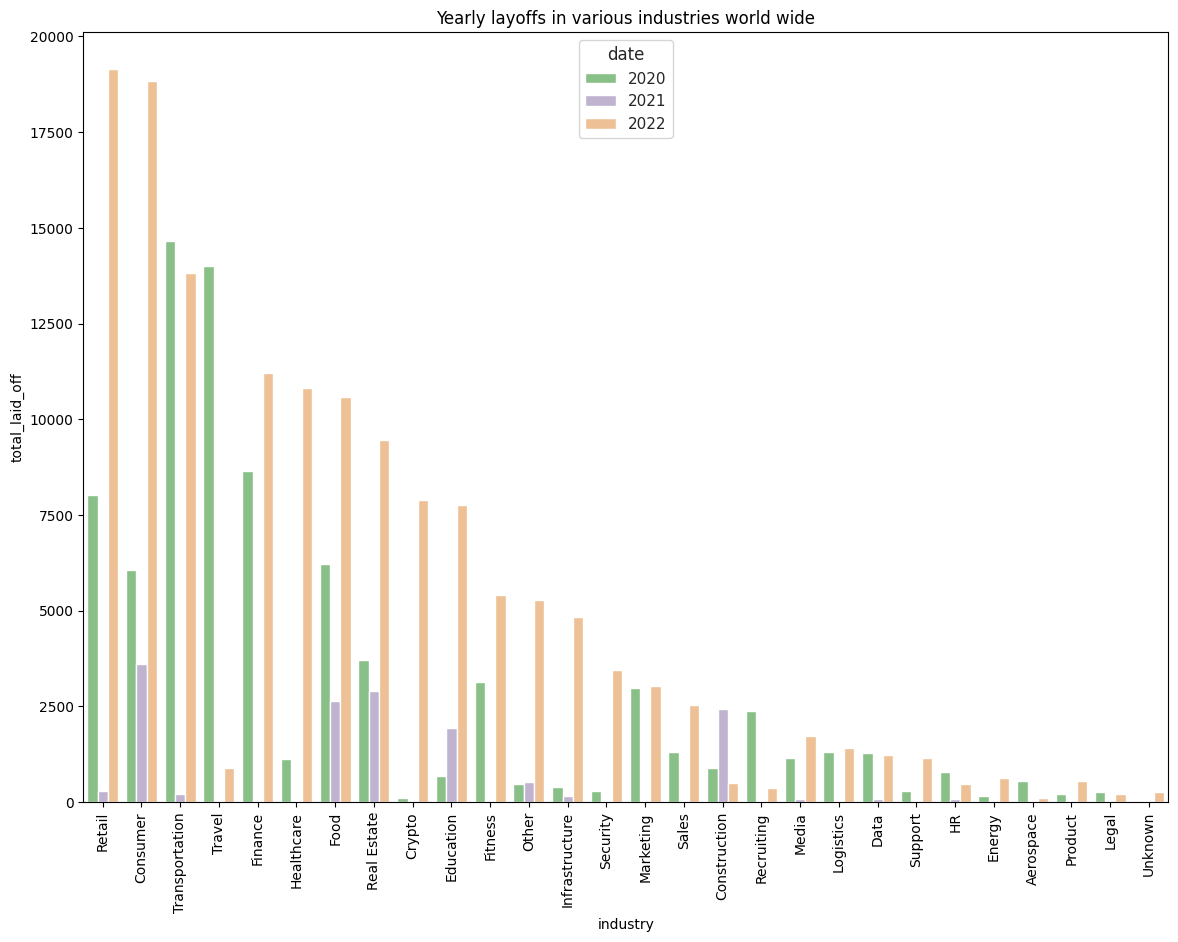

In [23]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

Yearly layoff trend for the whole world shows that Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022 Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later Retail, Consumer and Food industries face sharp increase in layoffs

In [24]:
df_usa = df[df['country']=="United States"]
df_minus_usa = df[df['country']!="United States"]

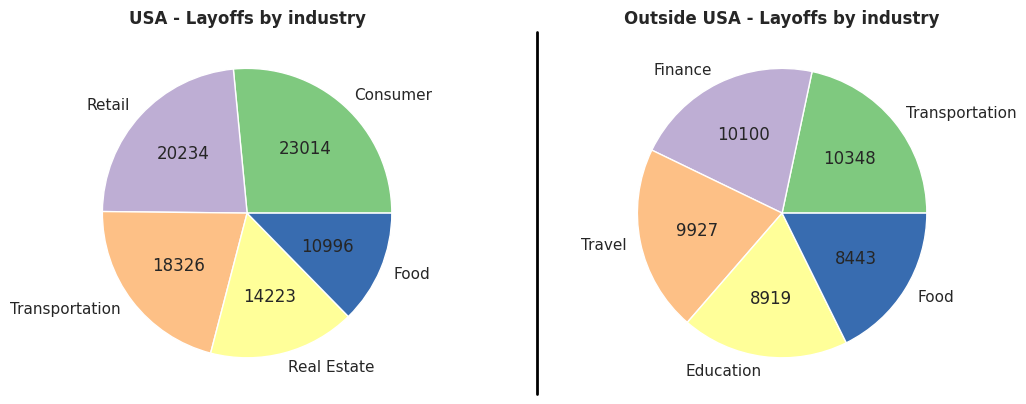

In [25]:
# isolate data to be plotted
d1 = df_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("USA - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside USA - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

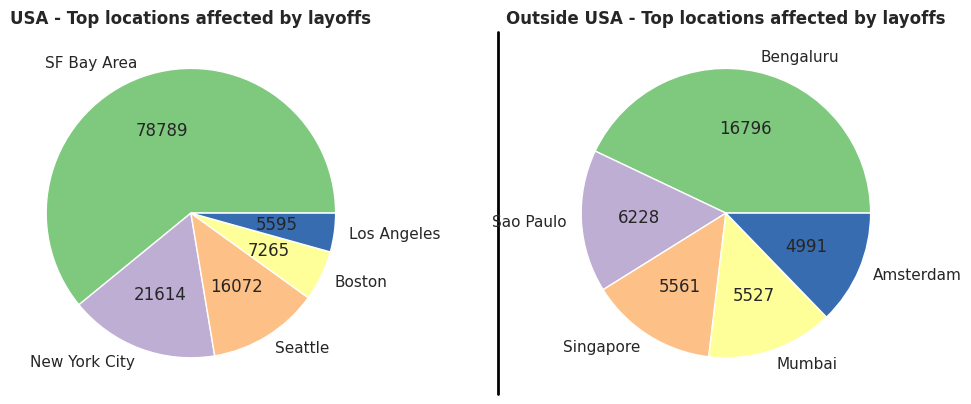

In [26]:
# isolate data to be plotted
d1 = df_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("USA - Top locations affected by layoffs", fontweight='bold')
ax2.set_title("Outside USA - Top locations affected by layoffs", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

In [27]:
df_usa_industry_yearly = df_usa.groupby([ df_usa.industry, df_usa.date.dt.year]).sum()

In [28]:
df_usa_industry_yearly = df_usa_industry_yearly.reset_index()

<Axes: title={'center': 'USA - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

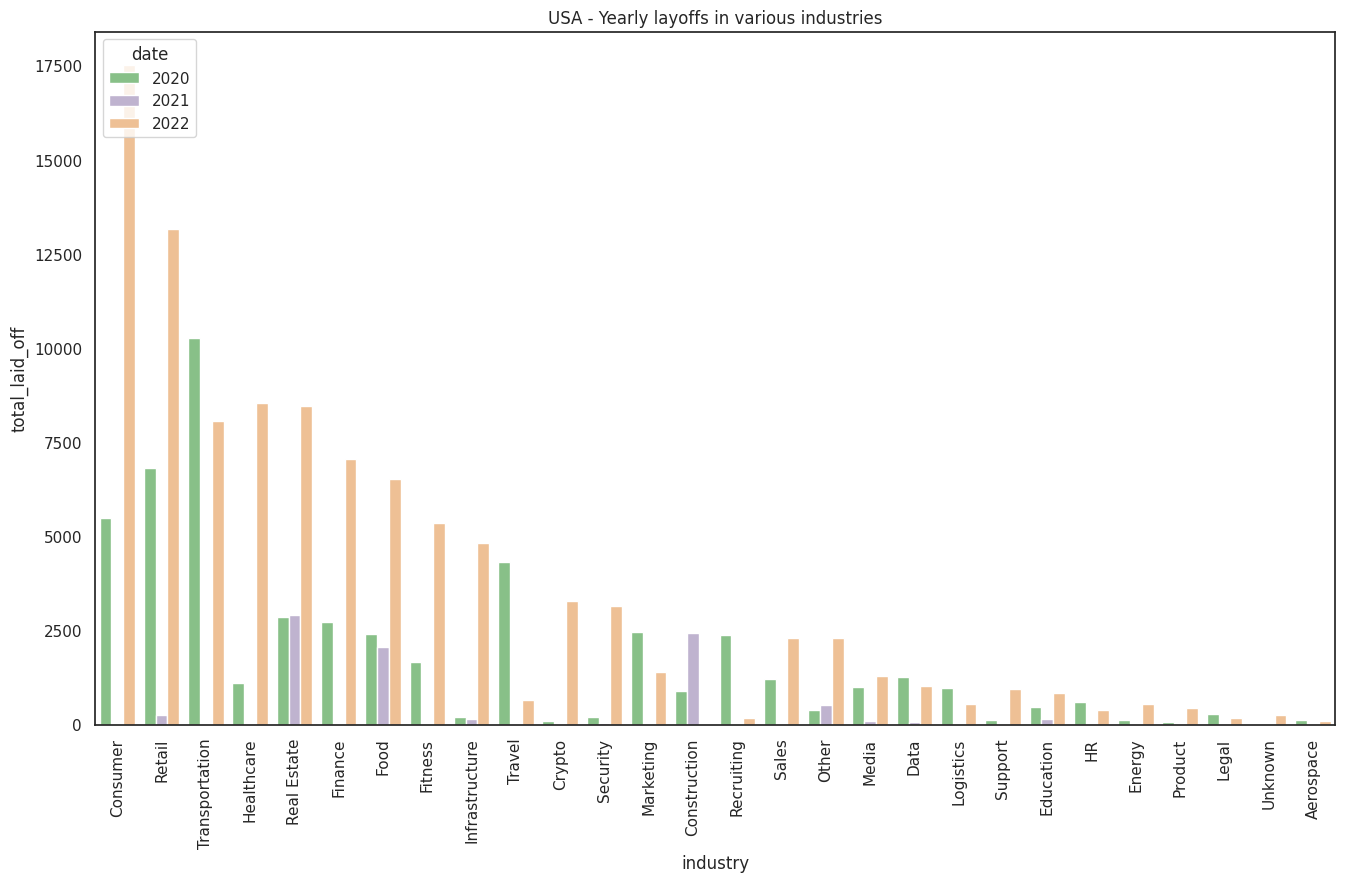

In [29]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
plt.title("USA - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

Yearly layoff trend for United States shows that Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022 Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later Consumer, Retail, Real Estate, Healthcare, Food and Fitness industries face sharp increase in layoffs in 2022 compared to 2020 Yearly layoff trend for the whole world matches with that of yearly trend in USA in the sense that layoffs were higher in 2020, then they dropped in 2021 and skyrocketed in 2022. This may be because majority of data in the dataset is about USA

In [30]:
df_india = df[df['country']=='India']
df_india_industry_yearly = df_india.groupby([ df_india.industry, df_india.date.dt.year]).sum()
df_india_industry_yearly = df_india_industry_yearly.reset_index()

<Axes: title={'center': 'India - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

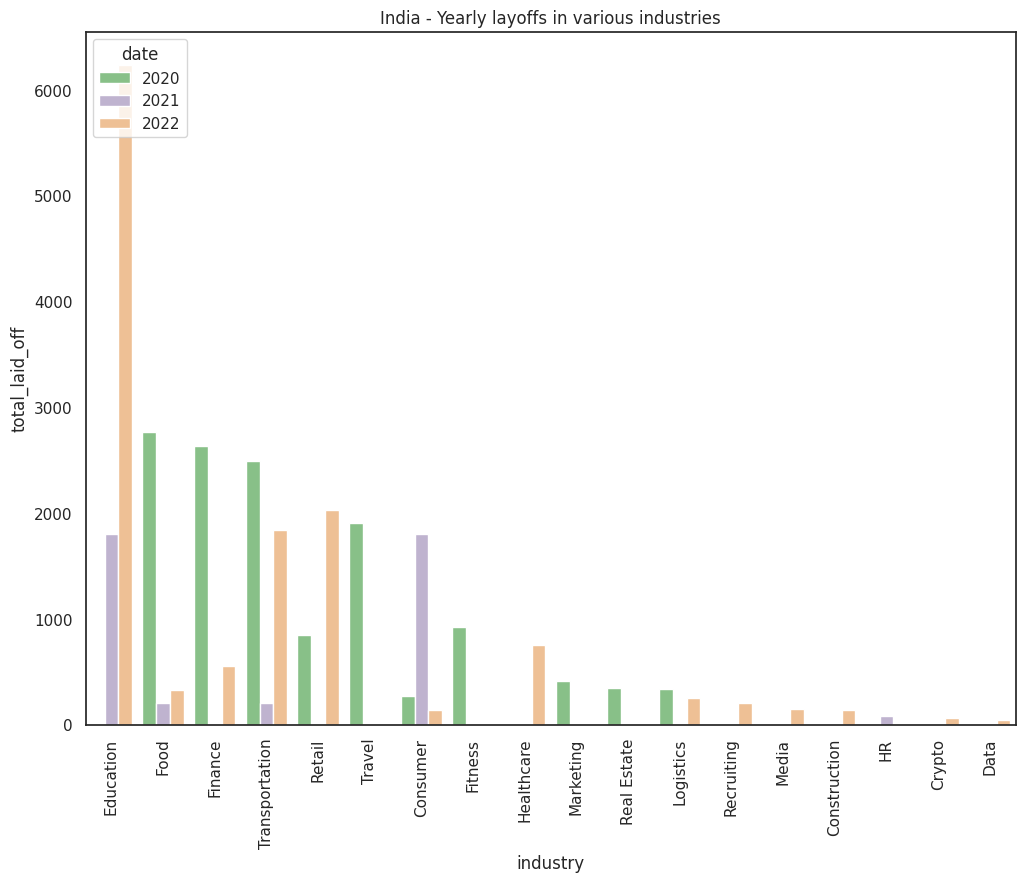

In [31]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("India - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_india_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

This shows

India suffered most layoffs in Education and Retail Industries

India performed well in most industries in 2022 compared to 2021

**Final Analysis**

United States suffered most layoffs followed by India, compared to the rest of the world. More than 75% of the employees laid off since 2020 belong to USA Consumer industry in USA is hit hardest with layoffs in 2022 while Food industry is affected most outside USA in 2022 Transportation and Food industries are affected by layoffs globally Travel industry faced considerably less layoffs globally in 2022 compared to 2022